In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv("telco_customer_churn.csv")

In [23]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [25]:
# Unwanted columns remove
df = df.drop(['customerID', 'gender'], axis=1)
print(df.columns)

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [27]:
# Space values-a  change to NaN-a 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# ippo dtype check
print(df['TotalCharges'].dtype)


float64


In [28]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})


In [29]:
print(df['Churn'].head())
print(df['Churn'].unique())


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64
[0 1]


In [30]:
# Automatically select columns with object or category dtype(method 1)
categorical_columns = df.select_dtypes(include=['object']).columns

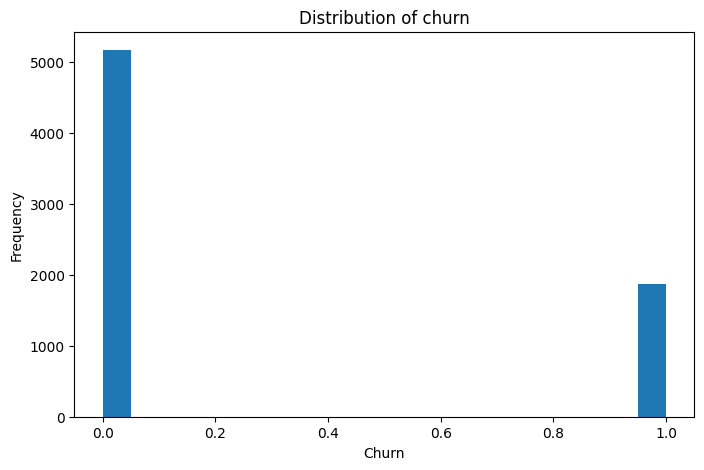

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(df['Churn'], bins=20)
plt.xlabel('Churn')
plt.ylabel('Frequency')
plt.title('Distribution of churn')
plt.show()

Most customers did not churn, and only a smaller portion of customers churned.

In [32]:
# converting category to numerical variable to build ML model
# label Encoding:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

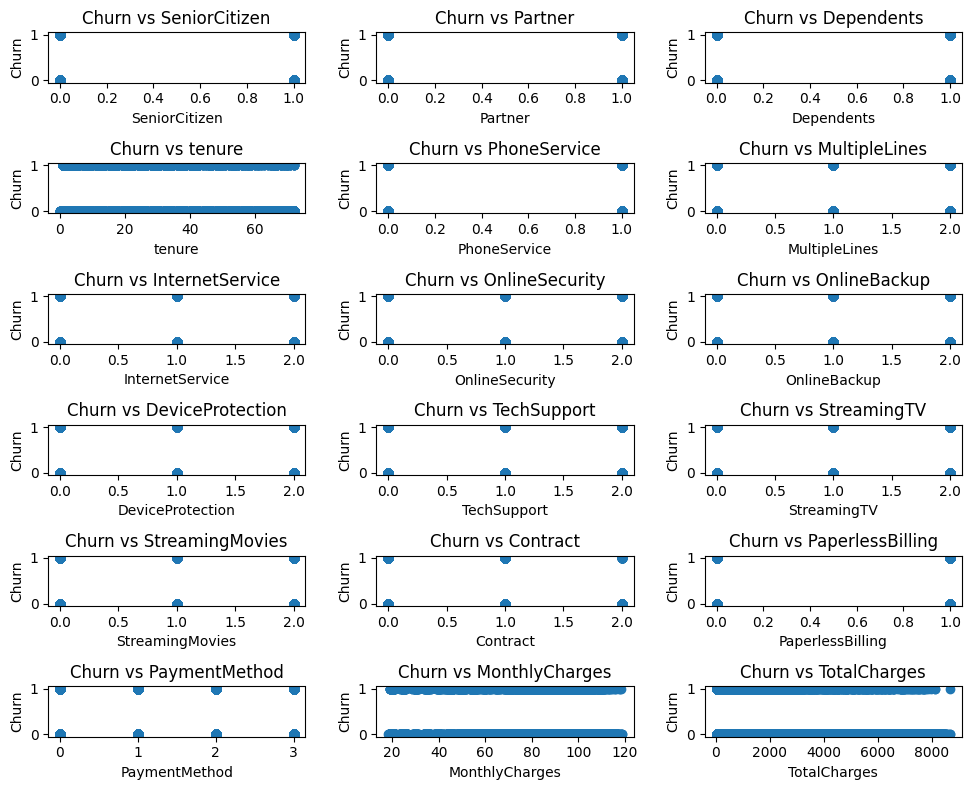

In [33]:
# target variable
y = df["Churn"]

# features (all except mpg)
X = df.drop("Churn", axis=1)

plt.figure(figsize=(10, 8))

# loop through each column and make subplots
for i, col in enumerate(X.columns):
    plt.subplot(6,3,i + 1)      # adjust grid size (3x3 for 8 columns)
    plt.scatter(df[col], y)
    plt.xlabel(col)
    plt.ylabel("Churn")
    plt.title(f"Churn vs {col}")

plt.tight_layout()
plt.show()

Customer churn is mainly influenced by tenure, contract type, monthly charges, and value-added services

In [34]:
corr=df.corr()
print(corr)

                  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
SeniorCitizen          1.000000  0.016479   -0.211185  0.016567      0.008576   
Partner                0.016479  1.000000    0.452676  0.379697      0.017706   
Dependents            -0.211185  0.452676    1.000000  0.159712     -0.001762   
tenure                 0.016567  0.379697    0.159712  1.000000      0.008448   
PhoneService           0.008576  0.017706   -0.001762  0.008448      1.000000   
MultipleLines          0.146185  0.142410   -0.024991  0.343032     -0.020538   
InternetService       -0.032310  0.000891    0.044590 -0.030359      0.387436   
OnlineSecurity        -0.128221  0.150828    0.152166  0.325468     -0.015198   
OnlineBackup          -0.013632  0.153130    0.091015  0.370876      0.024105   
DeviceProtection      -0.021398  0.166330    0.080537  0.371105      0.003727   
TechSupport           -0.151268  0.126733    0.133524  0.322942     -0.019158   
StreamingTV            0.030

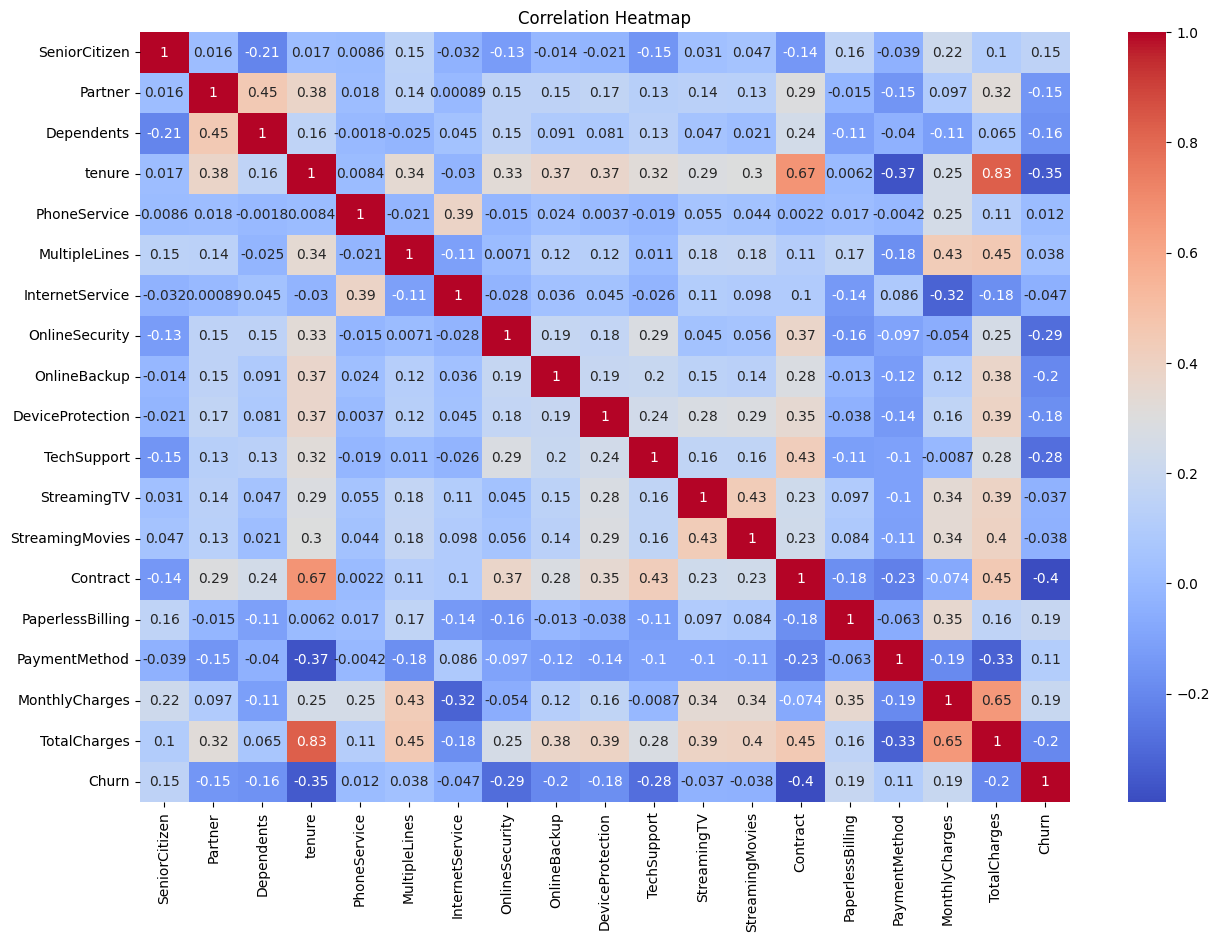

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Only a few features show strong correlation with churn, while most features have a weak relationship.

In [36]:
df.isnull().sum()


SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [37]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)


In [38]:
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

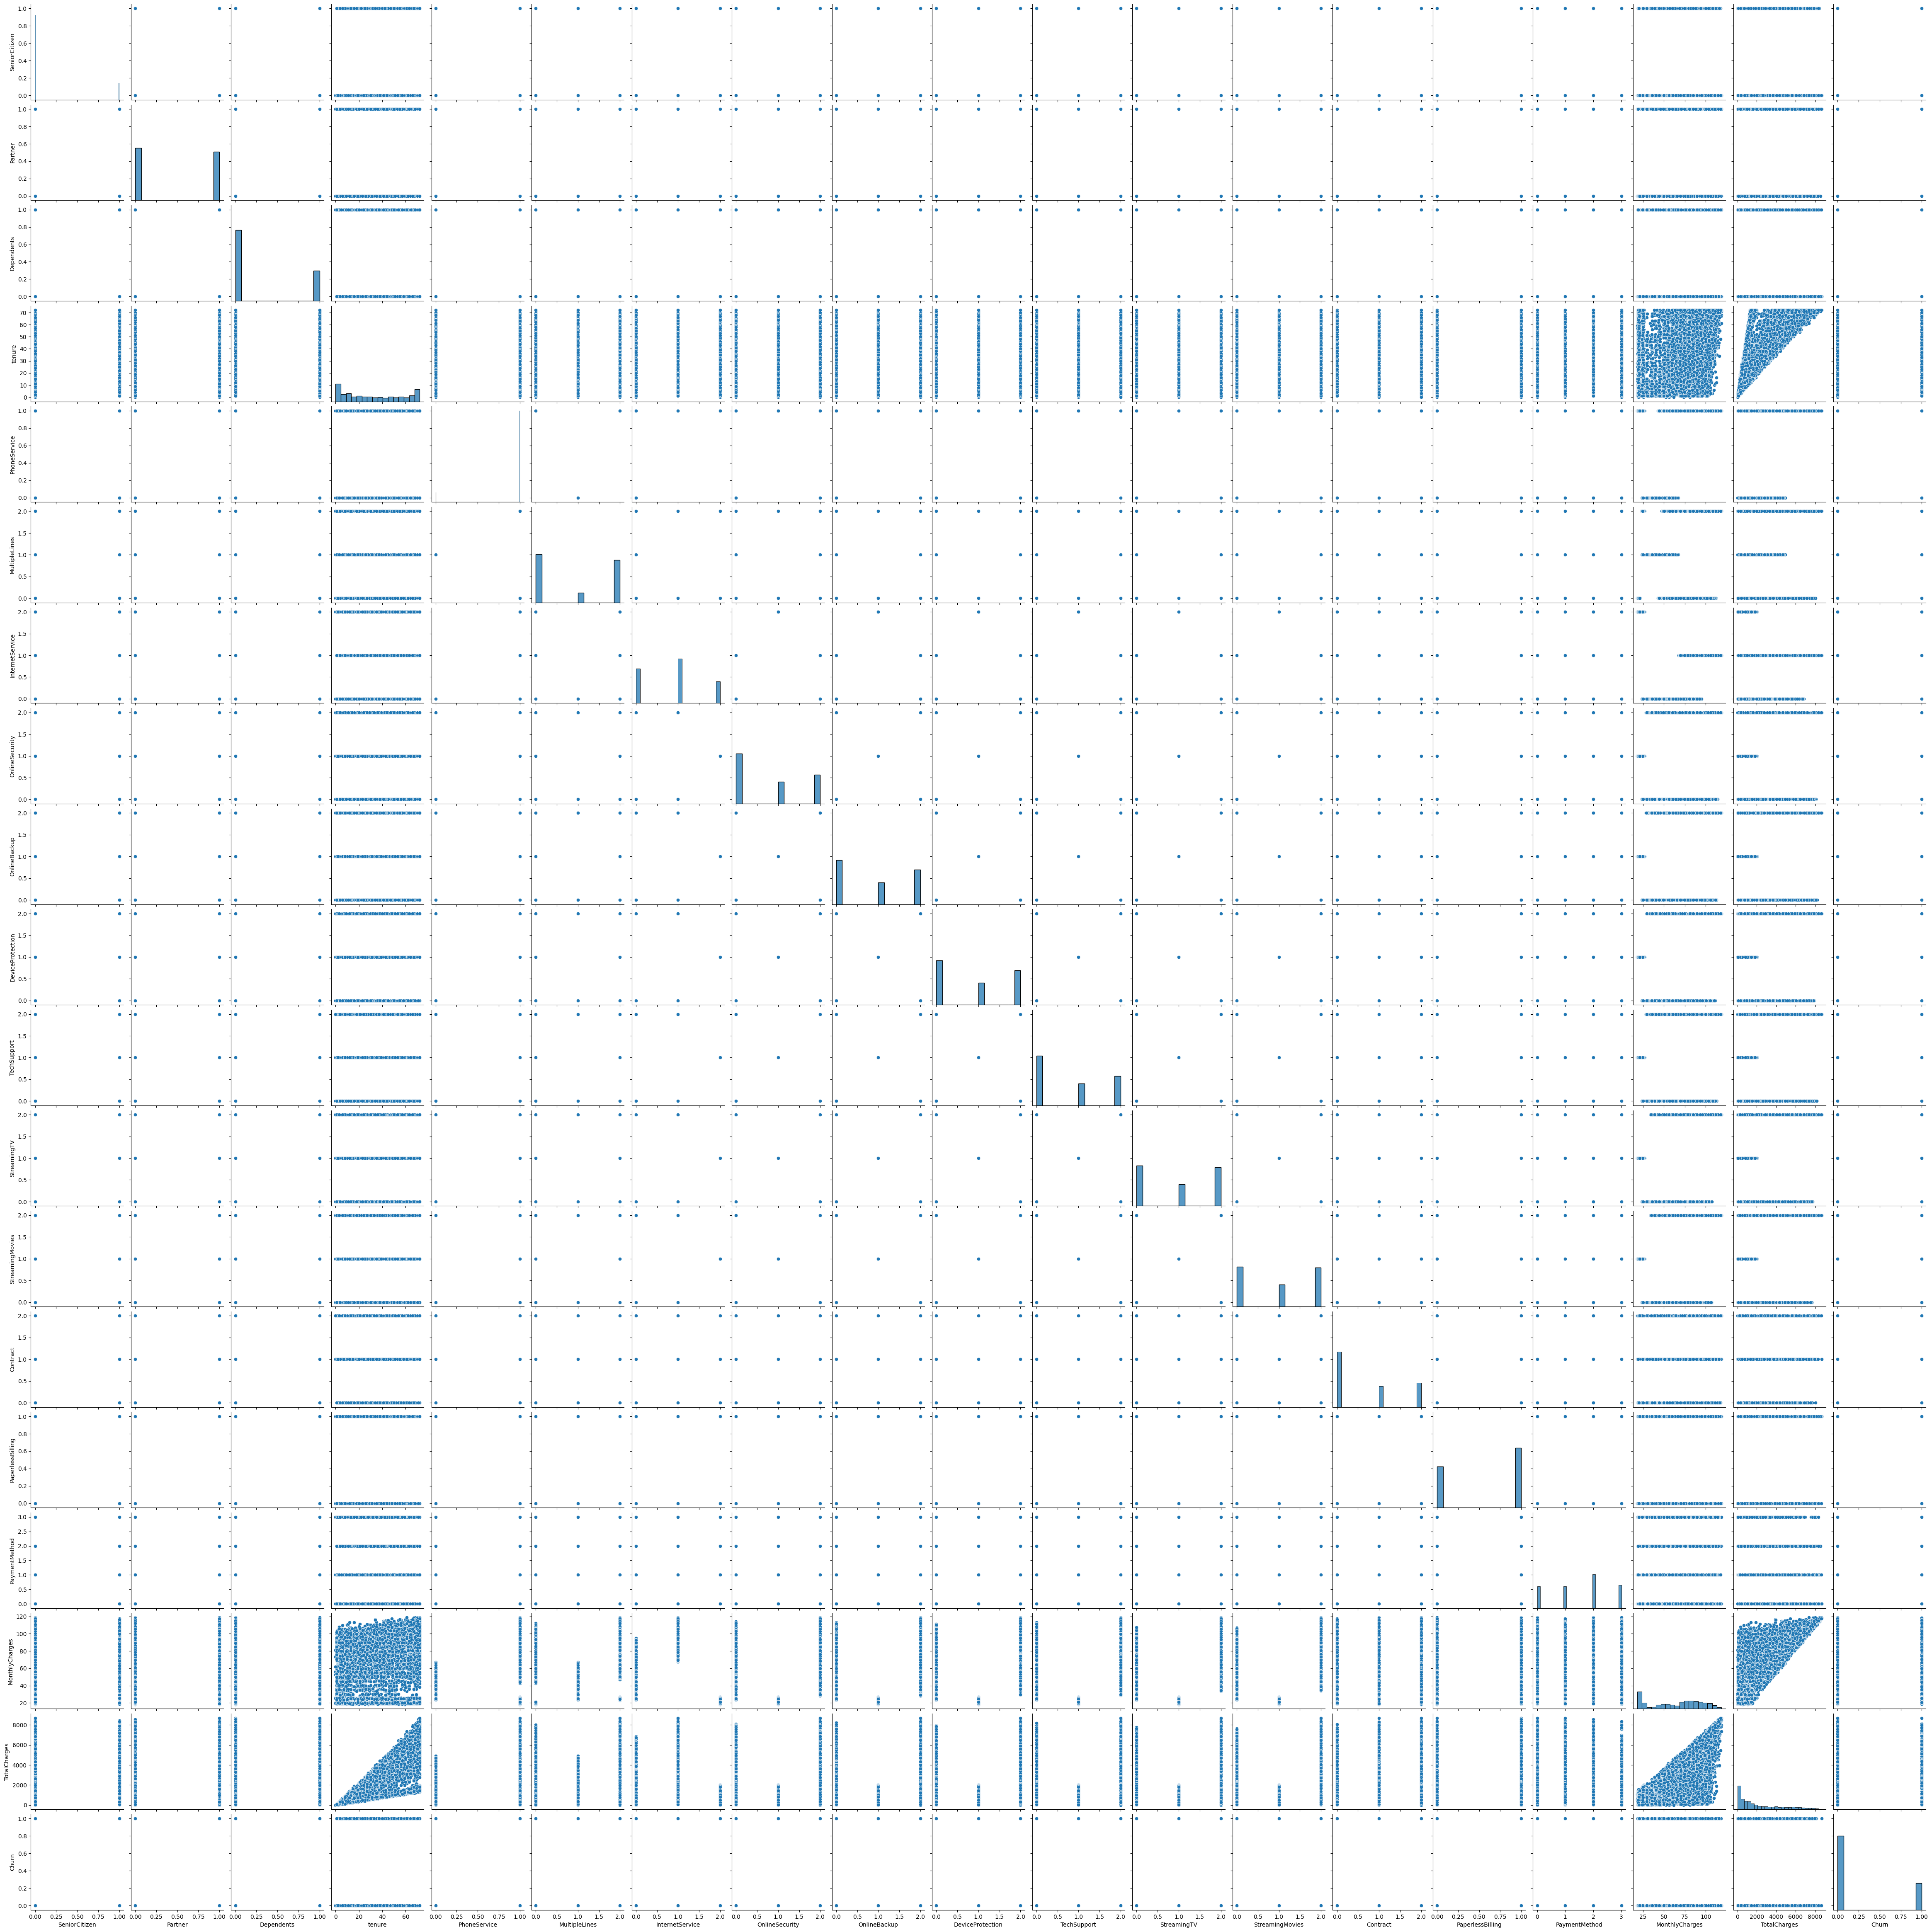

In [39]:
sns.pairplot(df)
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
Scaler = StandardScaler()
Scaler_data=Scaler.fit_transform(df)
print(Scaler_data)

[[-0.43991649  1.03453023 -0.65401193 ... -1.16032292 -0.99261052
  -0.60102348]
 [-0.43991649 -0.96662231 -0.65401193 ... -0.25962894 -0.17216471
  -0.60102348]
 [-0.43991649 -0.96662231 -0.65401193 ... -0.36266036 -0.9580659
   1.66382851]
 ...
 [-0.43991649  1.03453023  1.5290241  ... -1.1686319  -0.85293201
  -0.60102348]
 [ 2.27315869  1.03453023 -0.65401193 ...  0.32033821 -0.87051315
   1.66382851]
 [-0.43991649 -0.96662231 -0.65401193 ...  1.35896134  2.01389665
  -0.60102348]]


In [67]:
X=df.drop(columns=["Churn"])
y=df["Churn"]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced',solver='liblinear',max_iter=3000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'liblinear'
,max_iter,3000
,multi_class,'deprecated'


In [70]:
# Probability prediction of logistics regression on Train data
y_train_prob=model.predict_proba(X_train) # probability of X_train
print(y_train_prob)

[[0.77866855 0.22133145]
 [0.71534539 0.28465461]
 [0.18925909 0.81074091]
 ...
 [0.64148243 0.35851757]
 [0.10118327 0.89881673]
 [0.9113662  0.0886338 ]]


In [71]:
y_test_prob=model.predict_proba(X_test)
print(y_test_prob)

[[0.18467908 0.81532092]
 [0.8403373  0.1596627 ]
 [0.98616496 0.01383504]
 ...
 [0.88990727 0.11009273]
 [0.96033173 0.03966827]
 [0.23649302 0.76350698]]


In [81]:
# Predict on train and test data
y_train_pred = model.predict(X_train)# default threshold value = 0.5
print(y_train_pred)
# predict on test data
y_test_pred = model.predict(X_test)
print(y_test_pred)

[0 0 1 ... 0 1 0]
[1 0 0 ... 0 0 1]


In [82]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [83]:
from sklearn.metrics import confusion_matrix,classification_report
train_cm = confusion_matrix(y_train,y_train_pred)
train_report=classification_report(y_train,y_train_pred)
print(train_report)
print(train_cm)

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      4138
           1       0.51      0.81      0.63      1496

    accuracy                           0.74      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.81      0.74      0.76      5634

[[2985 1153]
 [ 287 1209]]


In [87]:
#confusion matrix
acc_train=(2985+1209)/(2985+1209+1153+287)
print(acc_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Train Precision: {train_precision:.2f}")
print(f"Train Recall: {train_recall:.2f}")
print(f"Train f1:{train_f1:.2f}")

0.744408945686901
Train Accuracy: 0.74
Train Precision: 0.51
Train Recall: 0.81
Train f1:0.63


In [85]:
from sklearn.metrics import confusion_matrix,classification_report
test_cm = confusion_matrix(y_test, y_test_pred) # (y_actual,y_predict)
test_report = classification_report(y_test, y_test_pred)
print(test_report)
print(test_cm)


              precision    recall  f1-score   support

           0       0.93      0.73      0.81      1036
           1       0.53      0.84      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409

[[754 282]
 [ 61 312]]


In [91]:
#confusion matrix
acc_test=(754+312)/(754+312+282+61)
print(acc_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test f1:{test_f1:.2f}")

0.7565649396735273
Test Accuracy: 0.76
Test Precision: 0.53
Test Recall: 0.81
Test f1:0.65


In [93]:
# Evaluate the model in train data'' program
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score, roc_curve
train_cm = confusion_matrix(y_train, y_train_pred) # (y_actual,y_predict)
train_report = classification_report(y_train, y_train_pred)
roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
print(train_cm)
print(train_report)
print(roc_auc_train)
#proba of class1
# roc- receiver operating characteristics , auc - area under the curve
# It is a plot between True positive rate ( Recall) and
# False Positive Rate ( 1-Specificity)
# For best model auc-roc value should be close to 1


[[2985 1153]
 [ 287 1209]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      4138
           1       0.51      0.81      0.63      1496

    accuracy                           0.74      5634
   macro avg       0.71      0.76      0.72      5634
weighted avg       0.81      0.74      0.76      5634

0.8426927259545673


In [94]:
# Evaluate the model in test data'' program
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score, roc_curve
test_cm = confusion_matrix(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print(test_cm)
print(test_report)
print(roc_auc_test)

[[754 282]
 [ 61 312]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.81      1036
           1       0.53      0.84      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409

0.8617025681368845


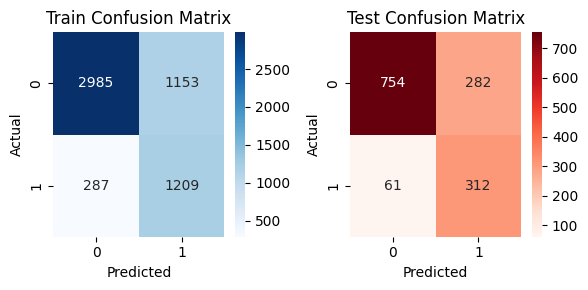

In [95]:
# confusion matrix training:
# Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds')
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


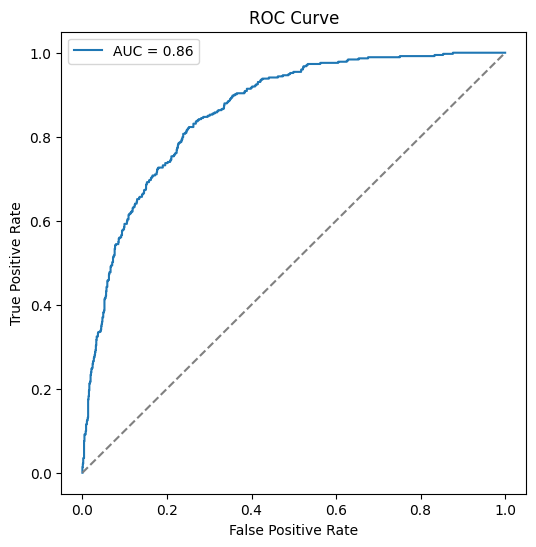

In [96]:
# Area under the Curve of Receiver Operator Characteristics.
# Plot ROC Curve
fpr, tpr,thresholds= roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_test:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [97]:
#craetea a display data in datframe
result_df=pd.DataFrame(X_train)
result_df['y_train']=y_train
result_df['y_train_pred']=y_train_pred
result_df

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,y_train,y_train_pred
2142,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.80,0,0
1623,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.45,0,0
6074,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.45,1,1
1362,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.95,1,1
6754,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00,1,1
5191,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30,0,0
5226,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05,0,0
5390,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15,1,1


In [98]:
df.to_csv("churn_predictions.csv", index=False)